## HONGYE ZHOU z5471284

In [183]:
import numpy as np
import gym

##### Gold represents the taxi location, blue is the pickup location, and purple is the drop-off location

In [184]:
env = gym.make("Taxi-v3", render_mode="ansi").env
state = env.reset()
rendered_env = env.render()
print(rendered_env)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [185]:
import matplotlib.pyplot as plt

In [186]:
import gym
import numpy as np


def train_q_learning(env, alpha, gamma, epsilon, episodes):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    acc_rewards = []
    epochs_per_episode = []
    for i in range(episodes):
        state = env.reset()[0]
        epochs, acc_reward= 0, 0
        done = False
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            next_state, reward, done, _, _ = env.step(action)
            acc_reward += reward
            pre_values = q_table[state, action]
            pre_state_action_value = np.max(q_table[next_state])
            next_state_action_value = (1 - alpha) * pre_values + alpha * (reward + gamma * pre_state_action_value)
            q_table[state, action] = next_state_action_value
            state = next_state
            epochs += 1
            # rendered_env = env.render()
            # print(rendered_env)
            # print("epochs:", epochs)
        acc_rewards.append(acc_reward)
        epochs_per_episode.append(epochs)
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, episodes, episodes), acc_rewards, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Accumulated Reward")
    plt.title("Accumulated Reward Over Episodes(QLearning)")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, episodes, episodes), epochs_per_episode, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Steps")
    plt.title("Steps Per Episodes(QLearning)")
    plt.legend()
    return q_table

def train_sarsa(env, alpha, gamma, epsilon, episodes):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    acc_rewards = []
    epochs_per_episode = []
    for i in range(episodes):
        state = env.reset()[0]
        action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[state])
        epochs, acc_reward = 0, 0
        done = False
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            acc_reward += reward
            pre_value = q_table[state, action]
            next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(q_table[next_state])
            next_state_action_value = q_table[next_state, next_action]
            next_value = (1 - alpha) * pre_value + alpha * (reward + gamma * next_state_action_value)
            q_table[state, action] = next_value
            state = next_state
            action = next_action
            epochs += 1
            # rendered_env = env.render()
            # print(rendered_env)
        epochs_per_episode.append(epochs)
        acc_rewards.append(acc_reward)
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.linspace(0, episodes, episodes), acc_rewards, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Accumulated Reward")
    plt.title("Accumulated Reward Over Episodes(SARSA)")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, episodes, episodes), epochs_per_episode, label="Learning")
    plt.xlabel("Episodes")
    plt.ylabel("Steps")
    plt.title("Steps Per Episodes(SARSA)")
    plt.legend()
    return q_table

env = gym.make('Taxi-v3', render_mode="ansi").env

C:\Users\learn\AppData\Roaming\Python\Python38\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


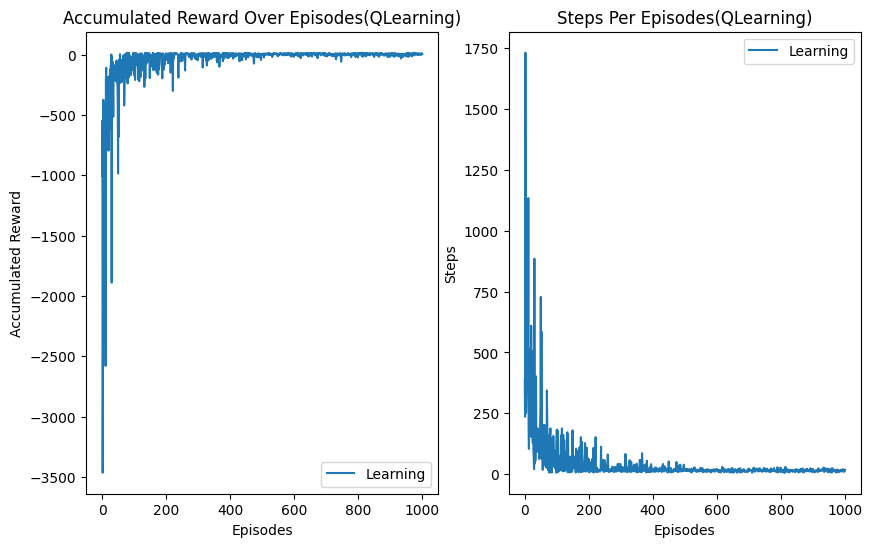

In [187]:

q_table_q_learning = train_q_learning(env, alpha = 0.4, gamma = 0.8, epsilon = 0.1, episodes = 1000)


##### 我认为当epsilon越小的时候，gamma可以最大，越来越贴近Q-learning，趋于稳定

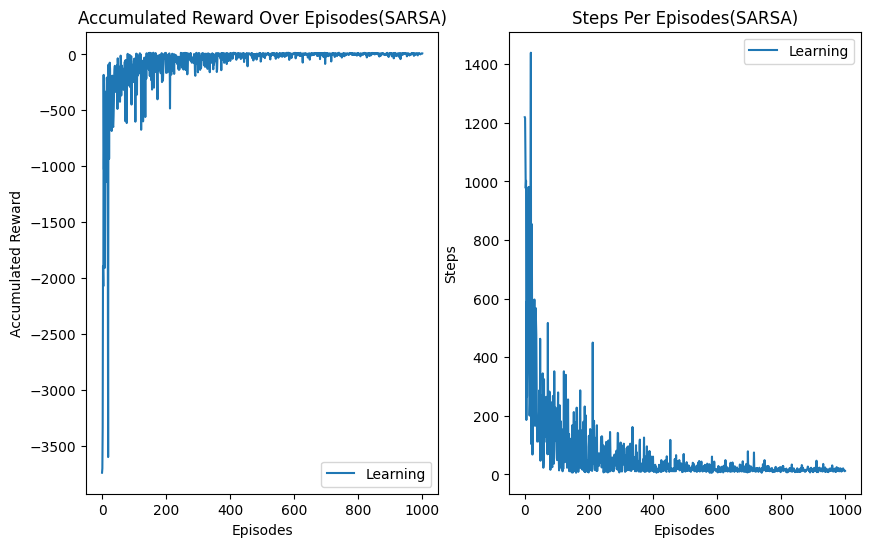

In [211]:

q_table_sarsa = train_sarsa(env, alpha = 0.2, gamma = 0.9, epsilon = 0.05, episodes = 1000)

In [189]:
def evaluate_policy(env, q_table, episodes=100):
    total_epochs, total_penalties = 0, 0
    for _ in range(episodes):
        state = env.reset()[0]
        epochs, penalties, reward = 0, 0, 0
        done = False
        while not done:
            action = np.argmax(q_table[state])
            state, reward, done, _, _= env.step(action)
            if reward == -10:
                penalties += 1
            epochs += 1
        total_penalties += penalties
        total_epochs += epochs
    print(f"Results after {episodes} episodes:")
    print(f"Average timesteps per episode: {total_epochs / episodes}")
    print(f"Average penalties per episode: {total_penalties / episodes}")


In [190]:

# 评估Q-Learning
print("Q-Learning Evaluation:")
evaluate_policy(env, q_table_q_learning)

# 评估SARSA
print("SARSA Evaluation:")
evaluate_policy(env, q_table_sarsa)


Q-Learning Evaluation:


KeyboardInterrupt: 